Привет, Даниэль! Как дела?) ☺️
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<b>Цели и задачи проекта</b>

Заказчиком поставлена задача подготовить модель выполняющую предсказания потребности в водителях в аэропортах. Цель - прогнозирование количества заказов на следующий час. Установлено требование по достижению метрики RMSE на тестовой выборке не более 48.


<b>Описание данных</b>

Представлены данные о дате и времени заказов (в разрезе каждого заказа) за период март-август 2018 года. Иная информация о заказах и/или заказчиках отсутствует.

<b>План работы</b>

Планируется провести:
1. Анализ представленного датасета на наличие ошибок/пропусков
2. Подготовка данных для обучения моделей
3. Обучение и выбор гиперпараметров используя модели Линейной регрессии, Случайного леса, CatBoost, LightGBM.
4. Тестирование моделей на выбранных гиперпараметрах на тестовой выборке.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

## Подготовка

In [1]:
#Библиотеки
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm

#модели
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

#Методы
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

#Метрики
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌

In [3]:
data = pd.read_csv('/datasets/taxi.csv', sep=',', index_col=[0], parse_dates=[0])

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Признак даты сделали индексом, тем самым преобразовали датафрейм во временной ряд 👍
</div>

In [4]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None


In [6]:
data.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [7]:
data = data.resample('1H').sum()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ресемплирование выполнено верно 👍 Суммирование проще интерпретируется, чем использование других агрегационных функций
</div>

In [8]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


data['year']=data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['hour']=data.index.hour

## Анализ

Предлагается:
1. Проверка на монотонность
2. Проверка на сезонность
3. Проверка на стационарность
4. Проверка на тренд

In [9]:
#Проверка на монотонность
print('Значение монотонности -', data.index.is_monotonic)

Значение монотонности - True


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>
   
Значения индекса расположены в хронологическом порядке 👍
</div>

In [10]:
print(data.index.min())
print(data.index.max())

2018-03-01 00:00:00
2018-08-31 23:00:00


Сезонность по году определить не получится, т.к. данные присутствуют только за период март-август одного года.
Проверим сезонность внутри недели/месяца

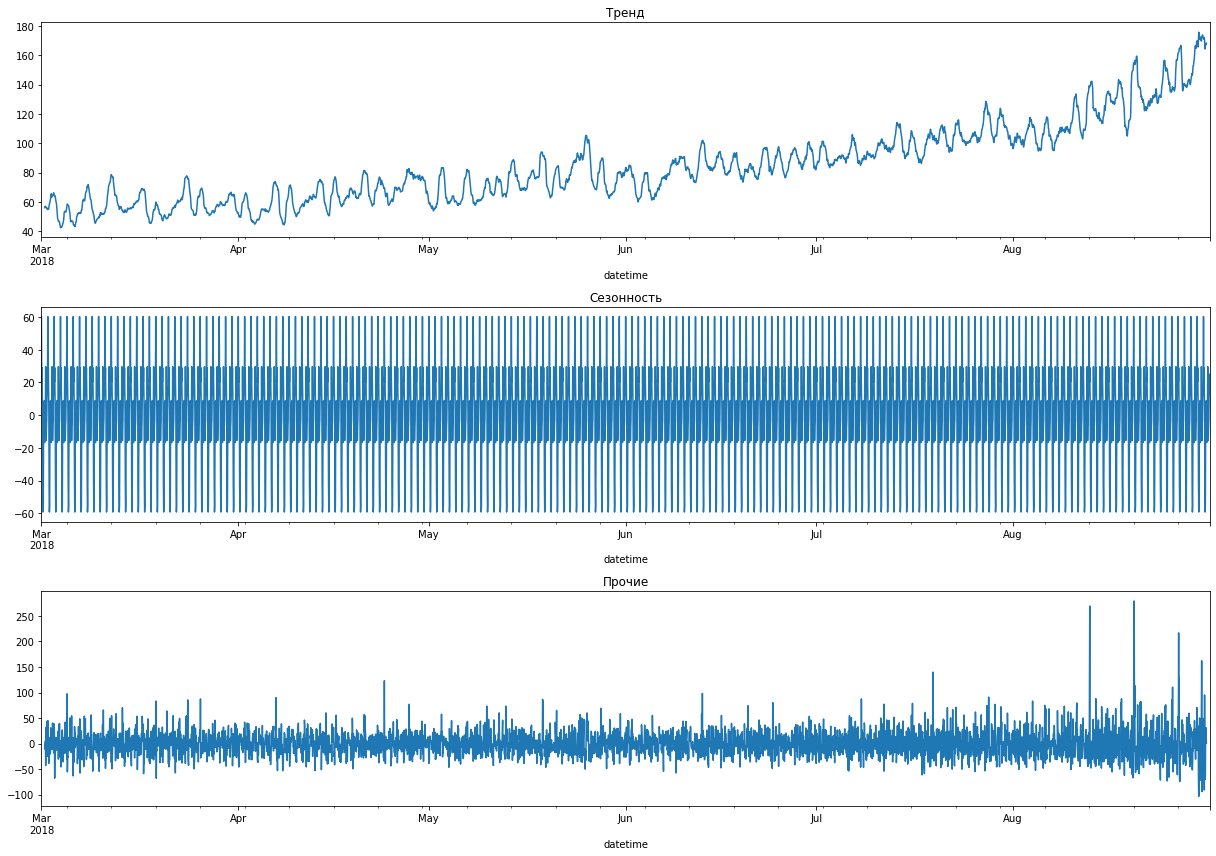

In [11]:
decomposed = seasonal_decompose(data) 

plt.figure(figsize=(17, 12))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Прочие')
plt.tight_layout()

В данных имеется тренд на увеличение поездок, который вероятно связан с ростом доли рынка.
Сезонность необходимо вывести дополнительно в месячном/недельном масштабе.</p>
Хвосты динамики использования сервиса показывают пиковые значения в конце августа что может быть связано с возвращением/приездом школьников учащихся с каникул, поездками в выходные дни по магазинам в связи с подготовкой к учебному году. Такого рода пиковые значения целесообразно регулировать силами регионального менеджмента, владеющего локальной спецификой.


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Декомпозировали исходный временной ряд, визуализировали компоненты - отлично 👍
</div>

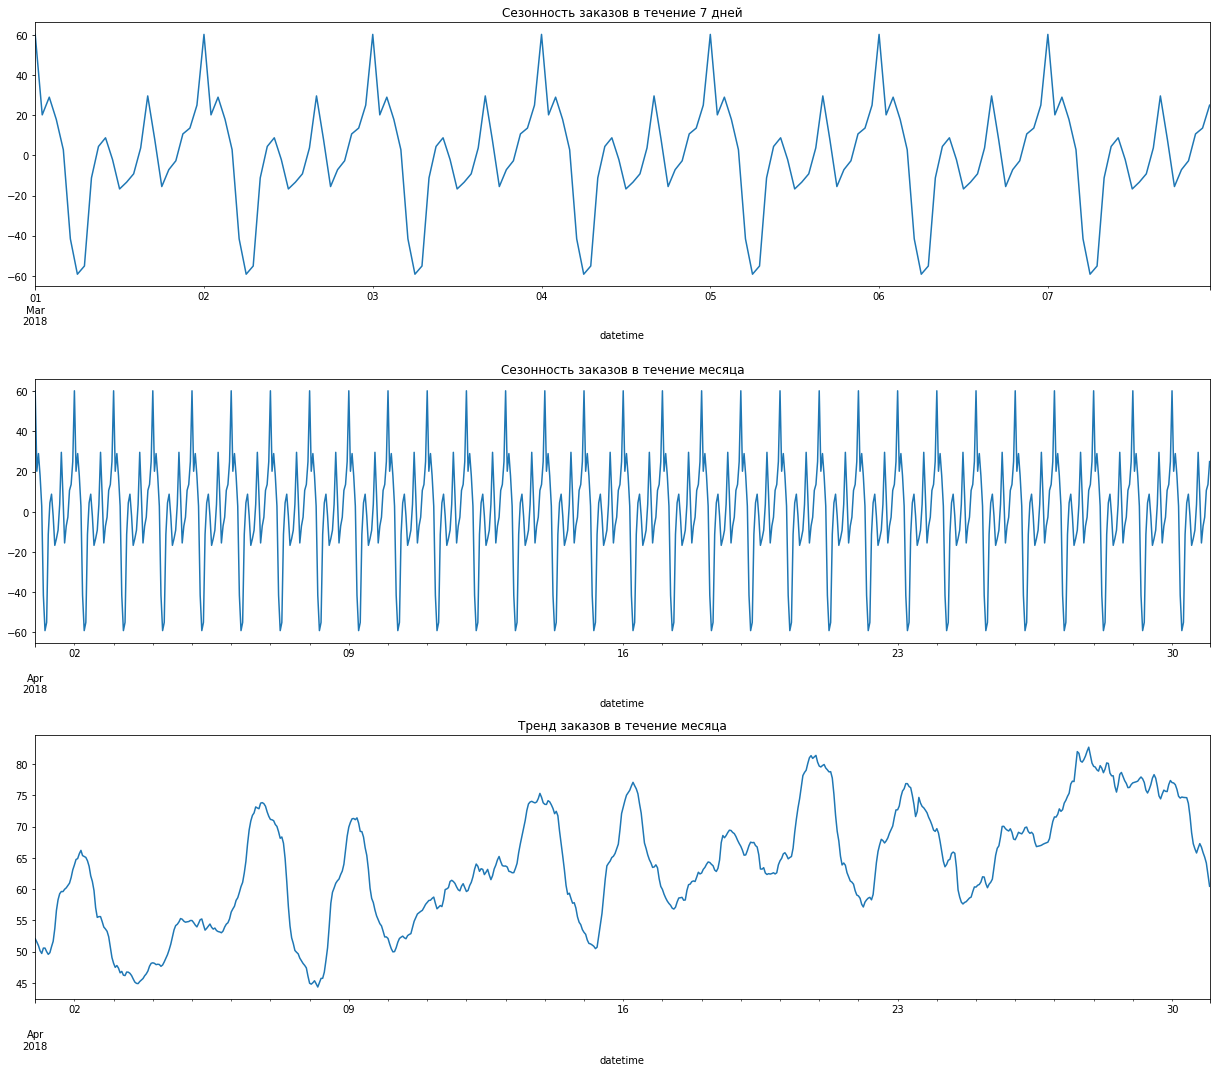

In [12]:
plt.figure(figsize=(17,15))
plt.subplot(311)
decomposed.seasonal['2018-03-01':'2018-03-7'].plot(ax=plt.gca())
plt.title("Сезонность заказов в течение 7 дней")
plt.subplot(312)
decomposed.seasonal['2018-04-01':'2018-04-30'].plot(ax=plt.gca())
plt.title("Сезонность заказов в течение месяца")
plt.subplot(313)
decomposed.trend['2018-04-01':'2018-04-30'].plot(ax=plt.gca())
plt.title("Тренд заказов в течение месяца")
plt.tight_layout()

В течение месяца и/или недели сезонность не подтвердилась. При этом очевидна сезонность в течение дня и есть тренд на увеличение количества поездок в уикенд и в/перед праздниками (в данном случае в конце апреля перед майскими праздниками.</p>
Посмотрим на дневные значения поездок в течение месяца:



<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Рассмотрели ряд на более коротком промежутке времени 👍
</div>

([<matplotlib.axis.XTick at 0x7f6ef18a5e20>,
 [Text(17622.0, 0, '6'),
  Text(17623.0, 0, '0'),
  Text(17624.0, 0, '1'),
  Text(17625.0, 0, '2'),
  Text(17626.0, 0, '3'),
  Text(17627.0, 0, '4'),
  Text(17628.0, 0, '5'),
  Text(17629.0, 0, '6'),
  Text(17630.0, 0, '0'),
  Text(17631.0, 0, '1'),
  Text(17632.0, 0, '2'),
  Text(17633.0, 0, '3'),
  Text(17634.0, 0, '4'),
  Text(17635.0, 0, '5'),
  Text(17636.0, 0, '6'),
  Text(17637.0, 0, '0'),
  Text(17638.0, 0, '1'),
  Text(17639.0, 0, '2'),
  Text(17640.0, 0, '3'),
  Text(17641.0, 0, '4'),
  Text(17642.0, 0, '5'),
  Text(17643.0, 0, '6'),
  Text(17644.0, 0, '0'),
  Text(17645.0, 0, '1'),
  Text(17646.0, 0, '2'),
  Text(17647.0, 0, '3'),
  Text(17648.0, 0, '4'),
  Text(17649.0, 0, '5'),
  Text(17650.0, 0, '6'),
  Text(17651.0, 0, '0')])

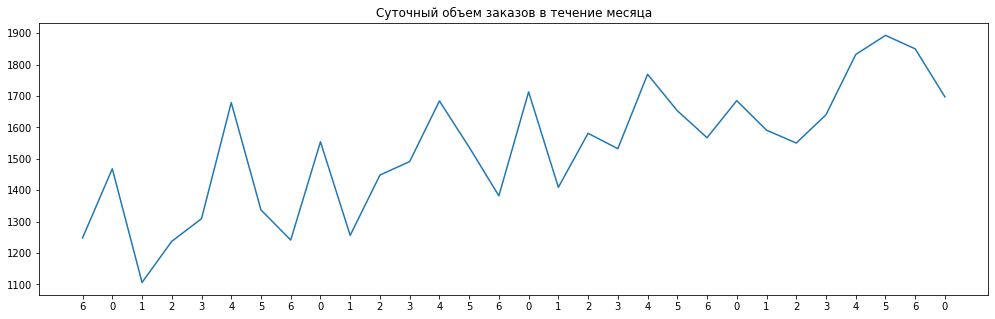

In [13]:
data_dayly = data.resample('1D').sum()
plt.figure(figsize=(17,5))
plt.title("Суточный объем заказов в течение месяца")
list_ax = data_dayly['2018-04-01':'2018-04-30'].index.dayofweek
plt.plot(data_dayly['2018-04-01':'2018-04-30'])
plt.xticks(data_dayly['2018-04-01':'2018-04-30'].index,list_ax)

Пики заказов приходятся на пятницу (здесь - 4) и понедельник (здесь - 0)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Рассмотрели сезонную компоненту на промежутке одних суток, чтобы увидеть пики и спады заказов. Как думаешь, чем обусловлена такая сезонность в контексте данных (заказы такси из аэропорта)?
</div>

In [14]:
#Проверим стационарность графика
test = sm.tsa.adfuller(data)
print ('adf: ', test[0]) 
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.0689242890279558
p-value:  0.028940051402612906
Critical values:  {'1%': -3.431842162413052, '5%': -2.8621993540813637, '10%': -2.567120978470452}
единичных корней нет, ряд стационарен


<b>Вывод</b> Представленные данные не содержат пропусков или выбросов. 
При этом данные представлены за несколько месяцев. Как следствие определить сезонность по году не представляется возможным. При этом очевидно имеется суточная сезонность (в отдельные часы наблюдается пиковый спрос), а также сезонность по дням недели (максимом заказов приходится на пятницу и понедельник). Имеется восходящий тренд вероятно связанный с ростом проникновения сервиса и увеличением доли на рынке.
Предлагается для обучения моделей и последующего прогнозирования использовать данные о дне недели и времени в часах как данные определяющие сезонность и как частный случай для данной модели использовать месяц для закрепления в модели "восходящего" тренда, в дальнейшем следовало бы использовать показатель месяц с начала наблюдений.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

По графику тренда заметно, что к концу лета количество заказов в час увеличилось.
</div>

## Обучение

Предлагается обучить и посмотреть результаты для моделей:

Линейная регрессия
Случайный лес
CatBoost
Light RGBM

In [15]:
#создадим функцию для оценки качества моделей по RMSE
def rmse_score (target, predictions):
    rmse = mean_squared_error(target, predictions)**0.5
    return rmse
from sklearn.metrics import make_scorer
scorer = make_scorer(rmse_score, greater_is_better=False)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хороший помощник 👍
</div>

In [16]:
#Подготовим признаки для обучения модели линейной регрессии
data['dayofweek'] = data.index.dayofweek
data['hour'] = data.index.hour

for _ in range(1,3):
    data['lag_'+str(_)] = data['num_orders'].shift(_)
#в связи с наиболее сильной сезонностью именно в течение суток установим скользящую среднюю за 24 часа
data['rolling_mean'] = data['num_orders'].shift().rolling(24).mean()  

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

На мой взгляд, не все факторы подходят чисто логически. Выскажу свою позицию:

1. Фактор год: НЕТ. У нас данных меньше года, поэтому будет просто константа.
2. Фактор месяц: НЕТ. Тренд будет и без месяца прослеживаться.
3. Фактор день: НЕТ. Также не подходит - будет просто последовательность чисел.
4. Фактор день недели: ДА. Так как у нас есть недельная сезонность.
5. Фактор час: ДА. Так как есть часовая (суточная) сезонность.
6. Фактор lag: ДА. Это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.
7. Фактор rolling: ДА. Это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделал анализ без указания месяца. Остальное вроде совпадает с твоим списком.
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Какие начальные значения можно подобрать для lag и скользящего среднего:

Lag. Его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и немного закусили. Повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией так же. Допустим, lag = 1 учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - повлияли на сегодняшние. Тогда lag = 2 учитывает как позавчерашние продажи влияют на сегодняшние.
    
Скользящее среднее. Предположим, rolling = 10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. Это будет некое подобие тренда - средней линии. Т.е. - сглаживание колебаний/выбросов.
    
Поэтому, если выставить сезонности - час и день недели, то дополнительные факторы могут быть такие: lag = 1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов. А это значит и для бизнеса будет легче доносить решение)

In [17]:
data = data.dropna()
features = data.drop('num_orders',axis=1)
target = data['num_orders']
features_train, features_test, target_train, target_test = train_test_split(features, target, shuffle=False, test_size=0.1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍 Отлично, что отключено перемешивание.
</div>

In [18]:
#для проведения кросс-валидации временного ряда загрузим специализированную функцию разбивки для целей кросс валидации

tscv = TimeSeriesSplit(n_splits=3) #возьмем 3 набора кросс валидации т.к. за вычетом тестового периода и минимально необходимого учебного остается порядка 3 месяцев для валидации


In [19]:
#Линейная регрессия
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False]}
searcher = GridSearchCV(model, parameters, cv=tscv, scoring='neg_root_mean_squared_error', verbose=1)
searcher.fit(features_train, target_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [20]:
print("Наилучший результат для ",type(model).__name__,"RMSE-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)

Наилучший результат для  LinearRegression RMSE- -32.62514027689935
Наилучшие параметры для  LinearRegression - {'fit_intercept': False, 'normalize': True}


In [21]:
#Случайный лес
# n_estimators менее 100 неактуально, возьмем от 300 и до 500 деревьев
# max_depth при 7 признаках более 8 будет приводить к переобучению. Менее 4 не имеет смысла, т.к. признаки не будут рассмотрены.

model = RandomForestRegressor(random_state=12345)
parameters_forest = {'n_estimators': range(300, 501, 50),
                 'max_depth': range(6,9)}
searcher = GridSearchCV(model, parameters_forest,
                         cv=tscv, verbose=1, scoring='neg_root_mean_squared_error')
searcher.fit(features_train, target_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': range(6, 9),
                         'n_estimators': range(300, 501, 50)},
             scoring='neg_root_mean_squared_error', verbose=1)

In [22]:
print("Наилучший результат для ",type(model).__name__,"RMSE-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)

Наилучший результат для  RandomForestRegressor RMSE- -28.535100438615377
Наилучшие параметры для  RandomForestRegressor - {'max_depth': 8, 'n_estimators': 500}


In [23]:
#CatBooost Regressor
model = CatBoostRegressor()
parameters = {'learning_rate': [0.05,0.3, 0.5, 0.8],
        'iterations': [50, 150, 500]}

searcher = GridSearchCV(model, parameters,
                         cv=tscv, verbose=1, scoring='neg_root_mean_squared_error')

searcher.fit(features_train, target_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
0:	learn: 28.5957303	total: 50.6ms	remaining: 2.48s
1:	learn: 28.0795121	total: 51.6ms	remaining: 1.24s
2:	learn: 27.5245428	total: 52.4ms	remaining: 821ms
3:	learn: 27.0165945	total: 53ms	remaining: 610ms
4:	learn: 26.5101203	total: 53.9ms	remaining: 485ms
5:	learn: 26.0822287	total: 54.5ms	remaining: 400ms
6:	learn: 25.6638819	total: 55.1ms	remaining: 338ms
7:	learn: 25.2354996	total: 55.7ms	remaining: 292ms
8:	learn: 24.8895291	total: 56.4ms	remaining: 257ms
9:	learn: 24.5393842	total: 57ms	remaining: 228ms
10:	learn: 24.2015773	total: 57.6ms	remaining: 204ms
11:	learn: 23.8493590	total: 58.3ms	remaining: 185ms
12:	learn: 23.5175939	total: 58.9ms	remaining: 168ms
13:	learn: 23.1922870	total: 59.6ms	remaining: 153ms
14:	learn: 22.9074075	total: 60.2ms	remaining: 140ms
15:	learn: 22.6150307	total: 60.8ms	remaining: 129ms
16:	learn: 22.3930638	total: 61.4ms	remaining: 119ms
17:	learn: 22.2126028	total: 62.1ms	remaining: 110ms

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=<catboost.core.CatBoostRegressor object at 0x7f6ef17d77c0>,
             param_grid={'iterations': [50, 150, 500],
                         'learning_rate': [0.05, 0.3, 0.5, 0.8]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [24]:
print("Наилучший результат для ",type(model).__name__,"RMSE-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)

Наилучший результат для  CatBoostRegressor RMSE- -27.378761133761287
Наилучшие параметры для  CatBoostRegressor - {'iterations': 50, 'learning_rate': 0.3}


In [25]:
model = LGBMRegressor(random_state=12345)
    
parameters = {'n_estimators': [500],
              'num_leaves': [10,21,32], 
              'learning_rate':[.1, 0.5]}
searcher = GridSearchCV(model, parameters,
                         cv=tscv, verbose=1, scoring='neg_root_mean_squared_error')

searcher.fit(features_train, target_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=LGBMRegressor(random_state=12345),
             param_grid={'learning_rate': [0.1, 0.5], 'n_estimators': [500],
                         'num_leaves': [10, 21, 32]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [26]:
print("Наилучший результат для ",type(model).__name__,"RMSE-", searcher.best_score_)
print("Наилучшие параметры для ",type(model).__name__,"-", searcher.best_params_)

Наилучший результат для  LGBMRegressor RMSE- -27.977026486211145
Наилучшие параметры для  LGBMRegressor - {'learning_rate': 0.1, 'n_estimators': 500, 'num_leaves': 10}


<b>Вывод</b> наилучшие результаты по метрике RMSE показала модель CatBOOSTRegressor RMSE - 27.4.
Учитывая установленное ограничение в RMSE - 48, можно сделать вывод что подготовка данных и настройки гиперпараметров сделаны в достаточном объеме.
Возможно перейти к тестированию моделей на выбранных гиперпараметрах.

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Поэтому лучше воспользоватся методами из sklearn:
</div>

```python
tscv = TimeSeriesSplit(n_splits=8) #надо посмотерть, как подобрать параметр и аргументировать
grid = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=tscv)
```

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Поправил кросс валидацию в части формирования выборок с учетом особенностей временного ряда.
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успешно исправлено</b>
</div>

## Тестирование

In [27]:
# Сложим результаты в таблицу для наглядного представления
params_metrics = pd.DataFrame(columns = ['model_name','RMSE', 'Overeducation','params'])

In [28]:
# объединим процедуры расчета метрик, тайминга и логирования результатов
def learn_and_job (model, features_train, target_train, features_test, target_test):
    model.fit(features_train, target_train) 
    
    predictions = model.predict(features_test)
        
    rmse = -1*mean_squared_error(target_test, predictions)**0.5
    
    over_edu = model.score(features_train,target_train)
    params_metrics.loc[len(params_metrics)]=[type(model).__name__,rmse,over_edu,model.get_params(deep=True)]

In [29]:
#Линейная регрессия
model = LinearRegression(fit_intercept = True, normalize = True)
learn_and_job(model, features_train, target_train, features_test, target_test)

In [30]:
#Случайный лес
model = RandomForestRegressor(random_state=12345, max_depth = 8, n_estimators = 500)
learn_and_job(model, features_train, target_train, features_test, target_test)

In [31]:
#CatBOOSTRegressor
model = CatBoostRegressor(loss_function="RMSE", learning_rate=0.5, iterations=500, silent=True)
learn_and_job(model, features_train, target_train, features_test, target_test)

In [32]:
#LightGBMRegressor
model = LGBMRegressor(random_state=12345,learning_rate = 0.1, n_estimators = 500, num_leaves = 10)
learn_and_job(model, features_train, target_train, features_test, target_test)

In [33]:
#Результаты работы моделей с тестовой выборкой на ранее отработанных гиперпараметрах
params_metrics

,model_name,RMSE,Overeducation,params
0,LinearRegression,-51.296368,0.363166,"{'copy_X': True, 'fit_intercept': True, 'n_job..."
1,RandomForestRegressor,-49.891688,0.750184,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri..."
2,CatBoostRegressor,-48.178299,0.959635,"{'iterations': 500, 'learning_rate': 0.5, 'los..."
3,LGBMRegressor,-43.651475,0.833457,"{'boosting_type': 'gbdt', 'class_weight': None..."


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для сравнения моделей заносишь их в общий датафрейм 👍
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отличный результат 👍 
</div>

<b>Вывод</b> модель LGBMRegressor показала наилучшие значения метрики, при этом уровень переобучения существенно ниже чем у CatBoostRegressor.
Целевая метрика достигнута. Снижение метрики относительно метрики полученной при кроссвалидации на этапе обучения/выбора модели вероятно обусловлено существенными пиками, приходящимися на конец предоставленного датасета. Данные пиковые значения связаны с тем что окончание датасета совпадает с окончанием каникул и началом учебного сезона, однакомогли негативно сказаться на RMSE показателе.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

<div class="alert alert-block alert-info">
<b>Комментарий студента v1:</b> Имеющиеся замечания отработал.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Спасибо за качественную работу)
</div>

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Анализ временных рядов на python https://habr.com/ru/company/ods/blog/327242/
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k
* Проверить ряд на стационарность можно с помощью теста Дики-Фуллера http://distrland.blogspot.com/2020/06/python_28.html
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результаты обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"